<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>How to convert ETH to USDT?</h3>


<h3>Import data</h3>
<p>
You can find the "ETHBUSD Dataset" from the following link: <a href="https://1824251045.rsc.cdn77.org/web/algohouse/data/ETHBUSD_trades_1m.csv">https://1824251045.rsc.cdn77.org/web/algohouse/data/ETHBUSD_trades_1m.csv</a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [3]:
import pandas as pd
import numpy as np

This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())



<h2>Reading the dataset from the URL</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://1824251045.rsc.cdn77.org/web/algohouse/data/ETHBUSD_trades_1m.csv">HERE</a> for free storage.


In [5]:
filename = "https://1824251045.rsc.cdn77.org/web/algohouse/data/ETHBUSD_trades_1m.csv"

you will need to download the dataset; if you are running locally, please comment out the following


In [6]:
await download(filename, "ETHBUSD_trades_1m.csv")
filename = "ETHBUSD_trades_1m.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [7]:
df = pd.read_csv(filename, index_col=0)

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [8]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:35:00,1218.09,1218.09,1218.09,1218.09,242.437,1,1218.090000
1,2022-11-11 14:38:00,1217.27,1217.27,1211.42,1211.42,5795.229,97,1213.655402
2,2022-11-11 14:39:00,1211.54,1212.21,1208.58,1209.36,4404.935,98,1210.132181
3,2022-11-11 14:40:00,1209.37,1213.17,1208.68,1211.86,4177.236,96,1210.617423
4,2022-11-11 14:41:00,1211.87,1217.92,1210.42,1216.97,5518.493,102,1215.029038


Our data now is clean but let's spoil them to show how we can deal with missing values and incorrect data

<div>Let's define <b>spoil_df</b> function which produces incorrect data of 3 types:</div>

<ol>
    <li>Text data (we work with numbers)</li>
    <li>Negative values (we work only with positive values)</li>
    <li>Missing values (NaN)</li>
</ol>

In [9]:
def spoil_df(df: pd.DataFrame, cols: list = ["close", "volume", "rec_count", "avg_price"]):
    rng = np.random.default_rng(seed=42)
    new_df = df.copy()
    for col in cols:
        m = rng.random(len(df))
        l1 = 0.03 # NaN
        l2 = 0.04 # Text
        l3 = 0.03 # Negative

        mask1 = m < l1 # NaN
        mask2 = (m >= l1) & (m < l1+l2) # Text
        mask3 = (m >= l1+l2) & (m < l1+l2+l3) # Negative

        new_df.loc[mask1, col] = np.NaN
        new_df.loc[mask2, col] = "?"
        new_df.loc[mask3, col] = -new_df.loc[mask3, col]
    return new_df

In [10]:
spoiled_df = spoil_df(df)

In [11]:
spoiled_df.head(10)

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:35:00,1218.09,1218.09,1218.09,1218.09,242.437,NaN,1218.09
1,2022-11-11 14:38:00,1217.27,1217.27,1211.42,1211.42,5795.229,97.0,1213.655402
2,2022-11-11 14:39:00,1211.54,1212.21,1208.58,1209.36,4404.935,98.0,1210.132181
3,2022-11-11 14:40:00,1209.37,1213.17,1208.68,1211.86,4177.236,96.0,1210.617423
4,2022-11-11 14:41:00,1211.87,1217.92,1210.42,-1216.97,5518.493,102.0,1215.029038
5,2022-11-11 14:42:00,1217.54,1218.57,1213.57,1213.67,4902.477,98.0,1216.557003
6,2022-11-11 14:43:00,1213.77,1217.30,1213.07,1213.44,3880.831,NaN,1214.615416
7,2022-11-11 14:44:00,1213.95,1217.99,1213.95,1217.65,2635.593,91.0,-1215.842047
8,2022-11-11 14:45:00,1218.21,1242.38,1217.46,1240.66,13815.26,111.0,1230.224639
9,2022-11-11 14:46:00,1239.67,1243.76,1232.67,1243.76,?,111.0,1237.839659


As we can see, several question marks, negative values and NaN appeared in the dataframe; those are incorrect data which may hinders our further analysis.

<div>So, how do we identify all that incorrect data and deal with it?</div> 

<b>How to work with incorrect data?</b>

Steps for working with incorrect data:

<ol>
    <li>Identify incorrect data</li>
    <li>Deal with incorrect data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle incorrect values</h2>

<h3 id="identify_missing_values">Identify incorrect values</h3>
<h4>Convert "?" to NaN</h4>
In the APEBUSD dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [12]:
# replace "?" to NaN
spoiled_df.replace("?", np.nan, inplace = True)
spoiled_df.head(10)

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:35:00,1218.09,1218.09,1218.09,1218.09,242.437,NaN,1218.090000
1,2022-11-11 14:38:00,1217.27,1217.27,1211.42,1211.42,5795.229,97.0,1213.655402
2,2022-11-11 14:39:00,1211.54,1212.21,1208.58,1209.36,4404.935,98.0,1210.132181
3,2022-11-11 14:40:00,1209.37,1213.17,1208.68,1211.86,4177.236,96.0,1210.617423
4,2022-11-11 14:41:00,1211.87,1217.92,1210.42,-1216.97,5518.493,102.0,1215.029038
5,2022-11-11 14:42:00,1217.54,1218.57,1213.57,1213.67,4902.477,98.0,1216.557003
6,2022-11-11 14:43:00,1213.77,1217.30,1213.07,1213.44,3880.831,NaN,1214.615416
7,2022-11-11 14:44:00,1213.95,1217.99,1213.95,1217.65,2635.593,91.0,-1215.842047
8,2022-11-11 14:45:00,1218.21,1242.38,1217.46,1240.66,13815.260,111.0,1230.224639
9,2022-11-11 14:46:00,1239.67,1243.76,1232.67,1243.76,NaN,111.0,1237.839659


<h4>Convert negative values to NaN</h4>

In [13]:
# replace negative values to NaN
num_cols = ["open", "high", "low", "close", "volume", "rec_count", "avg_price"]
ts = spoiled_df["ts"]
spoiled_df[num_cols] = spoiled_df[num_cols].astype("float")
spoiled_df = pd.concat([ts, spoiled_df[num_cols].mask(spoiled_df[num_cols] < 0)], axis=1)

In [14]:
spoiled_df.head(10)

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:35:00,1218.09,1218.09,1218.09,1218.09,242.437,NaN,1218.090000
1,2022-11-11 14:38:00,1217.27,1217.27,1211.42,1211.42,5795.229,97.0,1213.655402
2,2022-11-11 14:39:00,1211.54,1212.21,1208.58,1209.36,4404.935,98.0,1210.132181
3,2022-11-11 14:40:00,1209.37,1213.17,1208.68,1211.86,4177.236,96.0,1210.617423
4,2022-11-11 14:41:00,1211.87,1217.92,1210.42,NaN,5518.493,102.0,1215.029038
5,2022-11-11 14:42:00,1217.54,1218.57,1213.57,1213.67,4902.477,98.0,1216.557003
6,2022-11-11 14:43:00,1213.77,1217.30,1213.07,1213.44,3880.831,NaN,1214.615416
7,2022-11-11 14:44:00,1213.95,1217.99,1213.95,1217.65,2635.593,91.0,NaN
8,2022-11-11 14:45:00,1218.21,1242.38,1217.46,1240.66,13815.260,111.0,1230.224639
9,2022-11-11 14:46:00,1239.67,1243.76,1232.67,1243.76,NaN,111.0,1237.839659


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [15]:
missing_data = spoiled_df.isnull()
missing_data.head(10)

,ts,open,high,low,close,volume,rec_count,avg_price
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [16]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ts
False    67292
Name: ts, dtype: int64

open
False    67292
Name: open, dtype: int64

high
False    67292
Name: high, dtype: int64

low
False    67292
Name: low, dtype: int64

close
False    60668
True      6624
Name: close, dtype: int64

volume
False    60597
True      6695
Name: volume, dtype: int64

rec_count
False    60594
True      6698
Name: rec_count, dtype: int64

avg_price
False    60561
True      6731
Name: avg_price, dtype: int64



Based on the summary above, each column has 66528 rows of data and seven of the columns containing missing data:

<ol>
    <li>"close": +-6624 missing data</li>
    <li>"volume": +-6695 missing data</li>
    <li>"rec_count": +-6698 missing data</li>
    <li>"avg_price": +-6731 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Our dataset is tied to time, so we use the pandas interpolator to preserve data quality:

<b>Replace by frequency:</b>

<ul>
    <li>"rec_count": +-6698 missing data, replace them with frequency
    </li>
</ul>

<b>Replace by pandas interpolation:</b>

<ul>
    <li>"close": +-6624 missing data, replace them with model output</li>
    <li>"volume": +-6695 missing data, replace them with model output</li>
    <li>"avg_price": +-6731 missing data, replace them with model output</li>
</ul>




To see which values are present in a particular column, we can use the ".value_counts()" method:


In [17]:
spoiled_df["rec_count"].value_counts()

36.0     1103
45.0     1072
28.0     1066
41.0     1062
40.0     1061
         ... 
116.0       5
117.0       3
119.0       3
120.0       2
118.0       1
Name: rec_count, Length: 120, dtype: int64

We can see the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [18]:
freq_rec = spoiled_df["rec_count"].value_counts().idxmax()

The replacement procedure is very similar to what we have seen previously:


In [19]:
#replace the missing 'num-of-doors' values by the most frequent 
spoiled_df["rec_count"].replace(np.nan, freq_rec, inplace=True)

<h4>Replacing with pandas interpolation</h4>


Let's try different models for interpolation and take the best one

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Setting precision
pd.set_option("display.precision", 10)
# Methods without order
methods = ["linear", "nearest", "slinear", "quadratic", "cubic", "piecewise_polynomial", "pchip", "akima", "cubicspline"]
# Methods with order
order_methods = ["spline", "polynomial"]
performance = pd.DataFrame({"name": [], "MSE": [], "MAPE": []})
for method in methods:
    # print(method)
    nan_rows = spoiled_df["close"].isna()
    interpolated_close = spoiled_df["close"].interpolate(method=method)
    mse = mean_squared_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
    mape = mean_absolute_percentage_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
    performance.loc[len(performance.index)] = [method, mse, mape]
for method in order_methods:
    for order in [3, 5]:
        # print(f"method: {method}, order: {order}")
        nan_rows = spoiled_df["close"].isna()
        interpolated_close = spoiled_df["close"].interpolate(method=method, order=order)
        mse = mean_squared_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
        mape = mean_absolute_percentage_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
        performance.loc[len(performance.index)] = [f"{method}_{order}", mse, mape]
        
performance = performance.sort_values(by=["MAPE", "MSE"], ascending=True)
performance["MAPE"] = performance["MAPE"] * 100
performance["MAPE"] = performance["MAPE"].astype("str") 
performance["MAPE"] = performance["MAPE"].str.slice(stop=8) + "%"
performance.head(15)

,name,MSE,MAPE
0,linear,0.5635042318,0.033343%
5,piecewise_polynomial,0.5635042318,0.033343%
2,slinear,0.5635042318,0.033343%
6,pchip,0.5817196101,0.033790%
7,akima,0.6046116821,0.034418%
3,quadratic,0.7442320290,0.037921%
4,cubic,0.7823945602,0.039027%
11,polynomial_3,0.7823945602,0.039027%
8,cubicspline,0.7823945602,0.039027%
1,nearest,0.9860675423,0.044491%


How we can see the best model for interpolation is linear so we'll use it to replace NaN values

In [21]:
spoiled_df['close'].interpolate(method = 'linear', inplace=True)
spoiled_df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:35:00,1218.09,1218.09,1218.09,1218.090,242.437,36.0,1218.0900000000
1,2022-11-11 14:38:00,1217.27,1217.27,1211.42,1211.420,5795.229,97.0,1213.6554019160
2,2022-11-11 14:39:00,1211.54,1212.21,1208.58,1209.360,4404.935,98.0,1210.1321805293
3,2022-11-11 14:40:00,1209.37,1213.17,1208.68,1211.860,4177.236,96.0,1210.6174232028
4,2022-11-11 14:41:00,1211.87,1217.92,1210.42,1212.765,5518.493,102.0,1215.0290380580


In [22]:
spoiled_df.isna().sum()

ts              0
open            0
high            0
low             0
close           0
volume       6695
rec_count       0
avg_price    6731
dtype: int64

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "volume" column with the pandas interpolate.</b>

</div>


In [23]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
spoiled_df['volume'].interpolate(method = 'linear', inplace=True)
spoiled_df.head()
```

</details>


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [24]:
spoiled_df.dtypes

ts            object
open         float64
high         float64
low          float64
close        float64
volume       float64
rec_count    float64
avg_price    float64
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type "float" or "int", and variables with timestamps have type "datetime". For example, "open", "high", "low", "close", "avg_price" variables are numerical values that describe the price, so we should expect them to be of the type "float". "rec_count" should have type "int" because it describes quantity. 'ts' column should have type "datetime"; however, that column is shown as type "object". We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [25]:
spoiled_df["ts"] = spoiled_df["ts"].astype("datetime64[ns]")
spoiled_df["rec_count"] = spoiled_df["rec_count"].astype("int")

<h4>Let us list the columns after the conversion</h4>


In [26]:
spoiled_df.dtypes

ts           datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
rec_count             int32
avg_price           float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform ETH TO USDT:</p>
<p>In our dataset, "open", "high", "low", "close", "volume", "avg_price" are represented by ETH (Etherium) unit. However in most cases it is customary to use USDT.</p>
<p>We will need to apply <b>data transformation</b> to transform BUSD into USDT.</p>


<p>We can do many mathematical operations directly in Pandas.</p>


In [27]:
spoiled_df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:35:00,1218.09,1218.09,1218.09,1218.090,242.437,36,1218.0900000000
1,2022-11-11 14:38:00,1217.27,1217.27,1211.42,1211.420,5795.229,97,1213.6554019160
2,2022-11-11 14:39:00,1211.54,1212.21,1208.58,1209.360,4404.935,98,1210.1321805293
3,2022-11-11 14:40:00,1209.37,1213.17,1208.68,1211.860,4177.236,96,1210.6174232028
4,2022-11-11 14:41:00,1211.87,1217.92,1210.42,1212.765,5518.493,102,1215.0290380580


Let's get the exchange rate and convert ETH TO USDT

In [28]:
# Convert BUSD to USDT by mathematical operation
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=ETH&toAsset=USDT")#request for URL
# If the api is unavailable we set fixed rate
if res.status != 200:
    rate = 0.00063
else:
    # Converting json to dict
    res = await res.json()
    rate = float(res[0]["fromAssetMinAmount"])
    
print(f"The exchange rate is 1 ETH = {1/rate} USDT")

cols_to_convert = ["open", "high", "low", "close", "volume", "avg_price"]
for col in cols_to_convert:
    df[f"{col}_USDT"] = df[col] / rate

# check your transformed data 
df[["open_USDT", "high_USDT", "low_USDT", "close_USDT", "volume_USDT", "avg_price_USDT"]].head()

The exchange rate is 1 ETH = 1587.3015873015872 USDT


,open_USDT,high_USDT,low_USDT,close_USDT,volume_USDT,avg_price_USDT
0,1.9334761905e+06,1.9334761905e+06,1.9334761905e+06,1.9334761905e+06,3.8482063492e+05,1.9334761905e+06
1,1.9321746032e+06,1.9321746032e+06,1.9228888889e+06,1.9228888889e+06,9.1987761905e+06,1.9264371459e+06
2,1.9230793651e+06,1.9241428571e+06,1.9183809524e+06,1.9196190476e+06,6.9919603175e+06,1.9208447310e+06
3,1.9196349206e+06,1.9256666667e+06,1.9185396825e+06,1.9235873016e+06,6.6305333333e+06,1.9216149575e+06
4,1.9236031746e+06,1.9332063492e+06,1.9213015873e+06,1.9316984127e+06,8.7595126984e+06,1.9286175207e+06


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform "open" (price in BUSD) to EUR (1 BUSD = 0.92 EUR) and name the column "open_EUR" (use URL mentioned above but change USDT TO EUR).</b>

</div>


In [29]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# transform BUSD to EURO by mathematical operation
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BUSD&toAsset=EUR")
# If the api is unavailable we set fixed rate
if res.status != 200:
    rate = 0.92
else:
    # Converting json to dict
    res = await res.json()
    rate = float(res[0]["toAssetMinAmount"])
    
print(f"The exchange rate is 1 BUSD = {rate} EUR")

cols_to_convert = ["open", "high", "low", "close", "volume", "avg_price"]
for col in cols_to_convert:
    df[f"{col}_EUR"] = df[col] * rate

# check your transformed data 
df[["open_EUR", "high_EUR", "low_EUR", "close_EUR", "volume_EUR", "avg_price_EUR"]].head()
```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "open", "close" and "avg_price".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value), sklearn <b>MinMaxScaler</b></p>


In [30]:
from sklearn.preprocessing import MinMaxScaler
# replace (original value) by (original value)/(maximum value)
spoiled_df["open_norm"] = spoiled_df["open"] / spoiled_df["open"].max()
scaler = MinMaxScaler()
spoiled_df["close_norm"] = scaler.fit_transform(spoiled_df["close"].to_numpy().reshape(-1, 1))

In [31]:
spoiled_df[["open_norm", "close_norm"]].head()

,open_norm,close_norm
0,0.9035270556,0.5212060968
1,0.9029188147,0.4966497312
2,0.8986685458,0.4890656064
3,0.8970589326,0.4982696414
4,0.8989133257,0.5016015021


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "avg_price" using sklearn <b>MinMaxScaler</b>.</b>

</div>


In [32]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
scaler = MinMaxScaler()
spoiled_df["avg_price_norm"] = scaler.fit_transform(spoiled_df["avg_price"].to_numpy().reshape(-1, 1))


# show the scaled column
spoiled_df[["avg_price_norm"]].head()


```

</details>


Here we can see we've normalized "open", "close" and "avg_price" in the range of \[0,1].


<h2 id="binning">Binning and indicator variable</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "volume" is a real valued variable. What if we want to break it down into 3 bins and see which bin sold the most? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'volume' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Let's plot the histogram of "volume" to see what the distribution of "volume" looks like.


Text(0.5, 1.0, 'close bins')

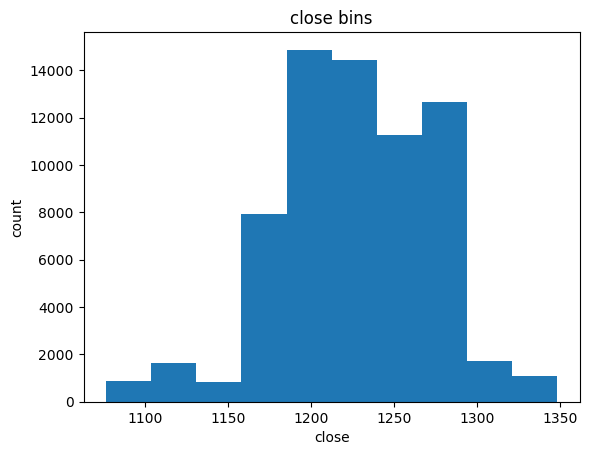

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(spoiled_df["close"])

# set x/y labels and plot title
plt.xlabel("close")
plt.ylabel("count")
plt.title("close bins")

In [34]:
bins = np.linspace(min(df["close"]), max(df["close"]), 4)
bins

array([1074.2       , 1165.51333333, 1256.82666667, 1348.14      ])

In [35]:
spoiled_df["close"].describe()

count    67292.0000000000
mean      1226.3727113178
std         45.7769057703
min       1076.5200000000
25%       1197.8337500000
50%       1218.6500000000
75%       1264.8000000000
max       1348.1400000000
Name: close, dtype: float64

We set group  names:


In [36]:
group_names = ["Low", "Medium", "High"]

We apply the function <b>cut</b> to determine what each value of `spoiled_df["volume"]` belongs to.


In [37]:
spoiled_df["close-binned"] = pd.cut(spoiled_df["close"], bins, labels=group_names, include_lowest=True)
spoiled_df[["close", "close-binned"]].head(20)

,close,close-binned
0,1218.090,Medium
1,1211.420,Medium
2,1209.360,Medium
3,1211.860,Medium
4,1212.765,Medium
5,1213.670,Medium
6,1213.440,Medium
7,1217.650,Medium
8,1240.660,Medium
9,1243.760,Medium


Let's see the "close" in each bin:


In [38]:
spoiled_df["close-binned"].value_counts()

Medium    41329
High      21581
Low        4382
Name: close-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'close bins')

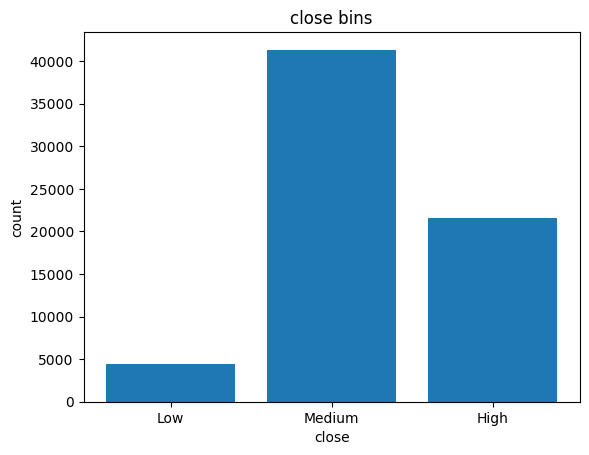

In [39]:
plt.bar(group_names, spoiled_df["close-binned"].value_counts().sort_index())

# set x/y labels and plot title
plt.xlabel("close")
plt.ylabel("count")
plt.title("close bins")

<p>
    As we can see we managed to create 3 classes based on "close"
</p>

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'close bins')

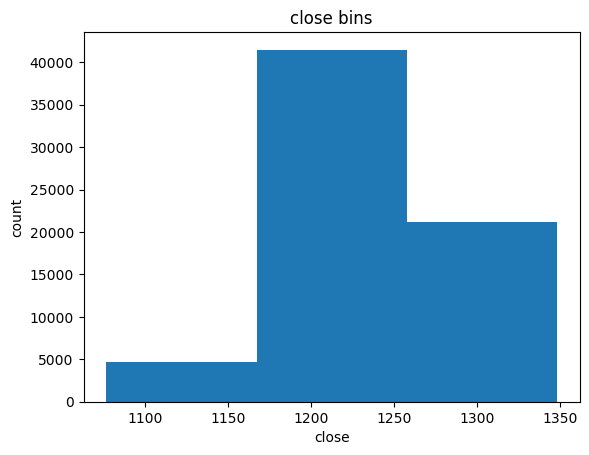

In [40]:
# draw historgram of attribute "close" with bins = 3
plt.hist(spoiled_df["close"], bins = 3)

# set x/y labels and plot title
plt.xlabel("close")
plt.ylabel("count")
plt.title("close bins")

The plot above shows the binning result for the attribute "close".


<h4 id="indicator">Indicator Variable (or Dummy Variable)</h4>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called "dummies" because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "volume-binned" has three unique values: "Low", "Medium" or "High". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "rec_count-binned" to indicator variables.
</p>

<p>
    We will use pandas' method <b>get_dummies</b> to assign numerical values to different categories of "close". 
</p>


Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [41]:
dummy_variable_1 = pd.get_dummies(spoiled_df["close-binned"], prefix="close")
dummy_variable_1.head()

,close_Low,close_Medium,close_High
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [42]:
# merge data frame "spoiled_df" and "dummy_variable_1" 
spoiled_df = pd.concat([spoiled_df, dummy_variable_1], axis=1)

# drop original column "rec_count-binned" from "spoiled_df"
spoiled_df.drop("close-binned", axis = 1, inplace=True)

In [43]:
spoiled_df.head()

,ts,open,high,low,close,volume,rec_count,avg_price,open_norm,close_norm,close_Low,close_Medium,close_High
0,2022-11-11 14:35:00,1218.09,1218.09,1218.09,1218.090,242.437,36,1218.0900000000,0.9035270556,0.5212060968,0,1,0
1,2022-11-11 14:38:00,1217.27,1217.27,1211.42,1211.420,5795.229,97,1213.6554019160,0.9029188147,0.4966497312,0,1,0
2,2022-11-11 14:39:00,1211.54,1212.21,1208.58,1209.360,4404.935,98,1210.1321805293,0.8986685458,0.4890656064,0,1,0
3,2022-11-11 14:40:00,1209.37,1213.17,1208.68,1211.860,4177.236,96,1210.6174232028,0.8970589326,0.4982696414,0,1,0
4,2022-11-11 14:41:00,1211.87,1217.92,1210.42,1212.765,5518.493,102,1215.0290380580,0.8989133257,0.5016015021,0,1,0


The last three columns are now the indicator variable representation of the volume variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "ts" (create spoiled_df["ts_month"] = spoiled_df["ts"].dt.month as category and then get_dummies from that column and then concatenate the spoiled_df) and merge the dataframes</b>

</div>


In [44]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Create a new columnb
spoiled_df["ts_month"] = spoiled_df["ts"].dt.month
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(spoiled_df["ts_month"], prefix="ts")
# Concatenate df's
spoiled_df = pd.concat([spoiled_df, dummy_variable_2], axis=1)
# Drop original column "ts_month" from "df"
spoiled_df.drop("ts_month", axis=1, inplace=True)
spoiled_df.head()


```

</details>


<h2>Resampling</h2>

<b>What is resampling?</b>
<p>
    Data resampling is any process whereby data is gathered and expressed in a summary form
</p>

Let's set "ts" as index to be able to resample our dataframe

In [45]:
spoiled_df.index = spoiled_df["ts"]

After resampling we can use different aggregation functions such as:

<ul>
    <li><b>mean()</b></li>
    <li><b>sum()</b></li>
    <li><b>prod()</b></li>
    <li><b>first()</b></li>
    <li><b>last()</b></li>
    <li><b>min()</b></li>
    <li><b>max()</b></li>
</ul>

In [49]:
spoiled_df[["open", "high", "low", "close", "volume", "rec_count", "avg_price"]].resample("15min").agg({"open": "first","high": "max","low": "min","close": "last","volume": "sum"})

,open,high,low,close,volume
ts,,,,,
2022-11-11 14:30:00,1218.09,1218.57,1208.58,1217.650,31557.231
2022-11-11 14:45:00,1218.21,1306.60,1217.46,1257.110,160743.231
2022-11-11 15:00:00,1258.30,1269.51,1238.73,1261.030,58212.784
2022-11-11 15:15:00,1260.82,1278.21,1252.46,1272.470,46304.142
2022-11-11 15:30:00,1272.37,1272.84,1250.95,1256.090,40400.293
...,...,...,...,...,...
2022-12-29 22:45:00,1197.05,1198.66,1197.02,1197.180,1945.211
2022-12-29 23:00:00,1197.18,1202.72,1196.35,1202.025,11594.703
2022-12-29 23:15:00,1201.65,1202.76,1200.16,1200.750,5425.302


How we can see we resampled data with aggregation time 15 min so we reduced amount of the data and generalized it. And we can make assumptions on much wider time window (15 min instead of 1 min)

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Apply resampling to "spoiled_df" with aggregation time 1 hour to columns "high", "low", "close". Then apply <b>max()</b> function</b>

</div>


In [47]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
spoiled_df[["high", "low", "close"]].resample('1h').max().head()
```

</details>


In [48]:
spoiled_df.to_csv("clean_df.csv", index=False)

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE ???</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2023-04-26        | 2.4     | Zhypnuk    | Made changes to the entire file
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
